In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys, requests, shutil, os
from urllib import request
from skimage import io
from skimage.transform import resize
import time, gc

%matplotlib inline

In [2]:
original_train = pd.read_csv('./data/train.csv')
original_test = pd.read_csv('./data/test.csv')

print('Train:\t\t', original_train.shape)
print('Test:\t\t', original_test.shape)

print('Landmarks:\t', len(original_train['landmark_id'].unique()))

Train:		 (1225029, 3)
Test:		 (117703, 2)
Landmarks:	 14951


In [3]:
resized_train = pd.read_csv('./data/train_resized.csv')
resized_test = pd.read_csv('./data/test_resized.csv')

print('Train:\t\t', resized_train.shape)
print('Test:\t\t', resized_test.shape)

print('Landmarks:\t', len(resized_train['landmark_id'].unique()))

Train:		 (1223295, 3)
Test:		 (117224, 2)
Landmarks:	 14950


In [4]:
original_train.head()

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231


In [5]:
resized_train.head()

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231


3f97333a6f4eb88e https://lh5.googleusercontent.com/-icOZxuqfhN4/RwAYG4qlPgI/AAAAAAAAEVw/dwJidW_tBrU/s1600/ 4221
3f97333a6f4eb88e https://lh5.googleusercontent.com/-icOZxuqfhN4/RwAYG4qlPgI/AAAAAAAAEVw/dwJidW_tBrU/s1600/ 4221


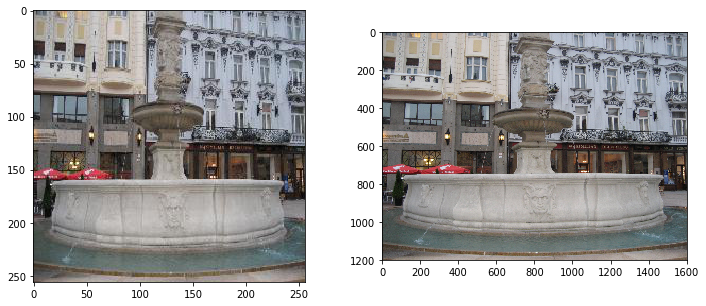

In [37]:
idx = np.random.randint(0, 1223294)
re_id, re_url, re_lid = resized_train.loc[idx].values
org_idx = original_train[original_train['id'] == re_id].index[0]
org_id, org_url, org_lid = original_train.loc[org_idx].values

print(re_id, re_url, re_lid)
print(org_id, org_url, org_lid)

re_img = io.imread('./data/train_resized/' + str(idx) + '.jpg')
org_img = io.imread('./data/raw_data/train_images/' + str(org_idx) + '.jpg')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].imshow(re_img)
ax[1].imshow(org_img)
plt.show()

5022b5998b93c71a https://lh3.googleusercontent.com/-cUeeryRr7Vo/WGrYd9Vk7nI/AAAAAAAAad8/rdem6Nmov6gaRXWyGSL_KW18tXvKQD3OQCOcB/s1600/
5022b5998b93c71a https://lh3.googleusercontent.com/-cUeeryRr7Vo/WGrYd9Vk7nI/AAAAAAAAad8/rdem6Nmov6gaRXWyGSL_KW18tXvKQD3OQCOcB/s1600/


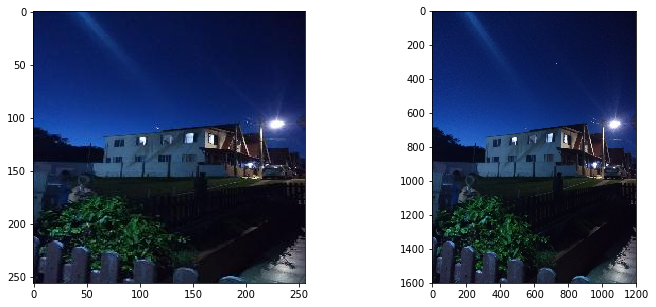

In [38]:
idx = np.random.randint(0, 117223)
re_id, re_url = resized_test.loc[idx].values
org_idx = original_test[original_test['id'] == re_id].index[0]
org_id, org_url = original_test.loc[org_idx].values

print(re_id, re_url)
print(org_id, org_url)

re_img = io.imread('./data/test_resized/' + str(idx) + '.jpg')
org_img = io.imread('./data/raw_data/test_images/' + str(org_idx) + '.jpg')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].imshow(re_img)
ax[1].imshow(org_img)
plt.show()